 # Project - Insurance Claims Severity

## Objective
* In this project, you are asked to build a regression model to predict how severe is a claim given some information about a particular claim. You would take advantage of the knowledge you have learned about regression problems and apply it in a practical project like this.
* Please take a good documentation explain the steps of your data analysis process and also some comments for your code as well so that anyone who read your code could get a good understanding of what is going on.
* Explain your results in the context of the claim severity, and give some insights or conclusion about your whole analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import time

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Load Data

In [4]:
claim_details = pd.read_csv('/Users/qi/Desktop/DS /camp/Project4/Project_4_Dataset/train.csv')
claim_size = claim_details.shape[0]
print(claim_size)
claim_details.info()

188318
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [5]:
claim_details.columns
# why doesn't work?

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'], dtype='object', length=132)

In [6]:
claim_details.shape

(188318, 132)

In [7]:
claim_details.head(2)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60


In [8]:
# check the missing values
claim_details.isnull().sum().sum()

0

In [9]:
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",200)
claim_details.dtypes

id          int64
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cat19      object
cat20      object
cat21      object
cat22      object
cat23      object
cat24      object
cat25      object
cat26      object
cat27      object
cat28      object
cat29      object
cat30      object
cat31      object
cat32      object
cat33      object
cat34      object
cat35      object
cat36      object
cat37      object
cat38      object
cat39      object
cat40      object
cat41      object
cat42      object
cat43      object
cat44      object
cat45      object
cat46      object
cat47      object
cat48      object
cat49      object
cat50      object
cat51      object
cat52      object
cat53      object
cat54      object
cat55     

In [10]:
# Check the target Y variable
claim_details['loss']

0         2213.18
1         1283.60
2         3005.09
3          939.85
4         2763.85
           ...   
188313    1198.62
188314    1108.34
188315    5762.64
188316    1562.87
188317    4751.72
Name: loss, Length: 188318, dtype: float64

In [11]:
#input test data
pro_4_test = pd.read_csv('/Users/qi/Desktop/DS /camp/Project4/Project_4_Dataset/test.csv')
pro_4_test.info()
# no loss, need to predict by using best model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Columns: 131 entries, id to cont14
dtypes: float64(14), int64(1), object(116)
memory usage: 125.5+ MB


In [12]:
pro_4_test.isnull().sum().sum()

0

In [13]:
# combine train and test data, engineering whole data features sametime
pro_4 = pd.concat([claim_details, pro_4_test]).reset_index(drop=True)
pro_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313864 entries, 0 to 313863
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 316.1+ MB


In [14]:
pro_4.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,313864.00000,313864.000000,313864.000000,313864.000000,313864.000000,313864.000000,188318.000000
mean,294108.450826,0.494096,0.507089,0.498653,0.492021,0.487513,0.491442,0.485360,0.486823,0.48571,0.498403,0.493850,0.493503,0.493917,0.495665,3037.337686
std,169641.129773,0.187768,0.207056,0.201961,0.211101,0.209063,0.205394,0.178531,0.199442,0.18185,0.185906,0.210002,0.209716,0.212911,0.222537,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.00008,0.000000,0.035321,0.036232,0.000228,0.178568,0.670000
25%,147263.750000,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.351299,0.317960,0.35897,0.364580,0.310961,0.314945,0.315758,0.294657,1204.460000
50%,294432.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438650,0.441060,0.44145,0.461190,0.457203,0.462286,0.363547,0.407020,2115.570000
75%,441176.500000,0.625272,0.681761,0.634224,0.652072,0.643315,0.655818,0.591165,0.623580,0.56889,0.619840,0.678924,0.679096,0.689974,0.724707,3864.045000
max,587634.000000,0.984975,0.862654,0.944251,0.956046,0.983674,0.997162,1.000000,0.982800,0.99540,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [15]:
claim_details.shape,pro_4_test.shape,pro_4.shape

((188318, 132), (125546, 131), (313864, 132))

## Group features by data type
Catigorical features and umerical features

In [16]:
data_types = pro_4.dtypes  
cat_cols = list(data_types[data_types=='object'].index)
con_cols = list(data_types[data_types=='int64'].index) + list(data_types[data_types=='float64'].index)

id_col = 'id'
target_col = 'loss'
con_cols.remove('id')
con_cols.remove('loss')

print ("Categorical features:", cat_cols)
print ( "Numerical features:", con_cols)
print ( "ID: %s, target: %s" %( id_col, target_col))

Categorical features: ['cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat25', 'cat26', 'cat27', 'cat28', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat37', 'cat38', 'cat39', 'cat40', 'cat41', 'cat42', 'cat43', 'cat44', 'cat45', 'cat46', 'cat47', 'cat48', 'cat49', 'cat50', 'cat51', 'cat52', 'cat53', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat71', 'cat72', 'cat73', 'cat74', 'cat75', 'cat76', 'cat77', 'cat78', 'cat79', 'cat80', 'cat81', 'cat82', 'cat83', 'cat84', 'cat85', 'cat86', 'cat87', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat93', 'cat94', 'cat95', 'cat96', 'cat97', 'cat98', 'cat99', 'cat100', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat107', 'cat108', 'cat1

## Some Data Exploration

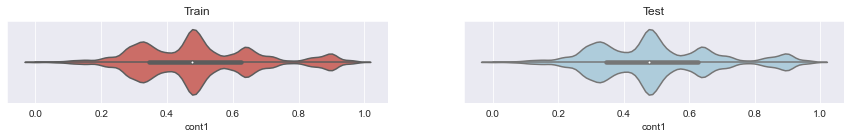

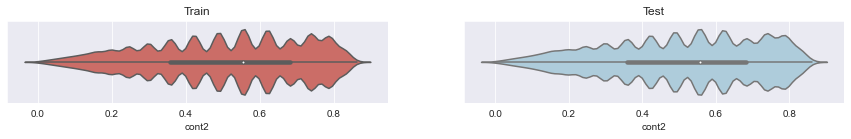

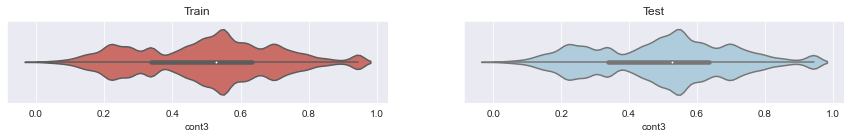

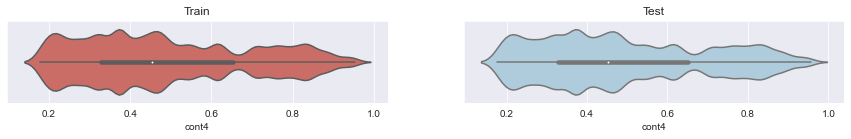

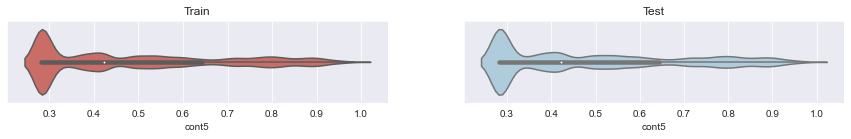

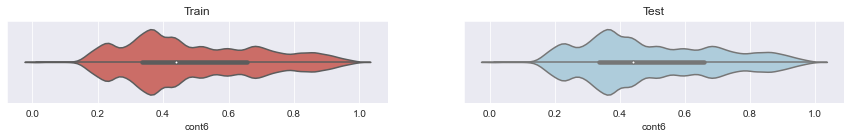

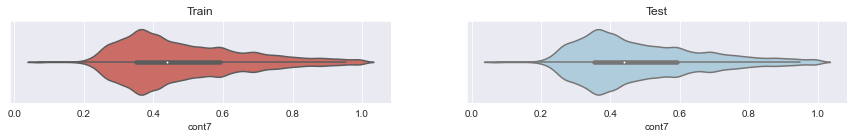

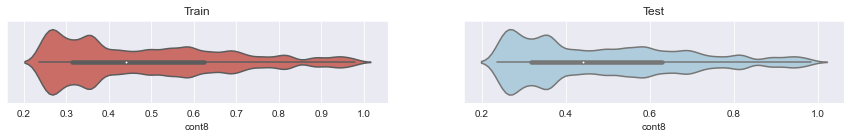

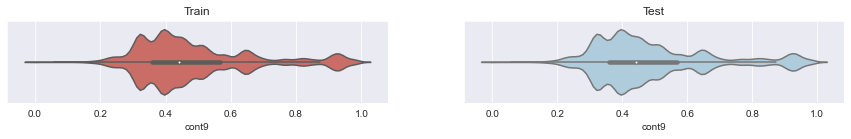

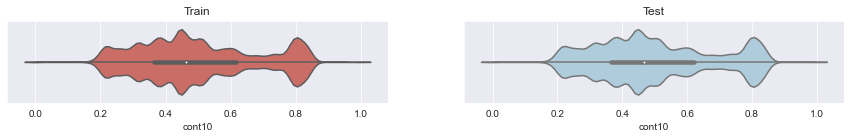

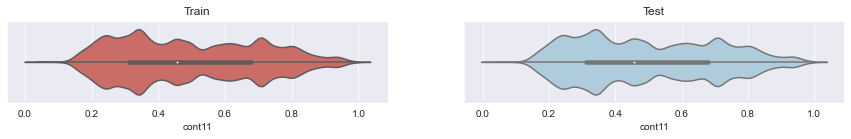

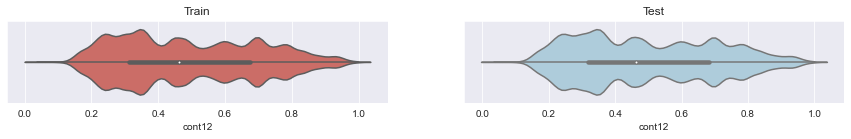

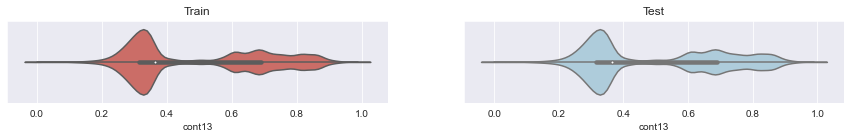

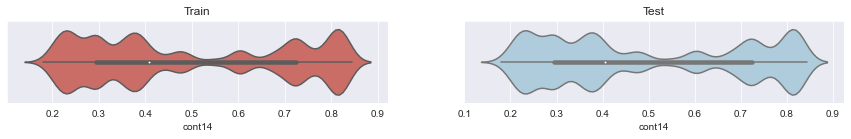

In [17]:
# Plot violin for all attributes in a 7x2 grid
# violin plot: a combination of box and density plots
#n_cols = 2
#n_rows = 7

#for i in range(n_rows):
    #fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    #for j in range(n_cols):
        #sns.violinplot(y=con_cols[i*n_cols+j], data=claim_details, ax=ax[j])

count = 1

for i in range(len(con_cols)):
    fig = plt.figure(figsize = (15,25))
    sns.set_style('darkgrid')
    plt.subplot(len(con_cols),2,count)
    sns.violinplot(claim_details[con_cols[i]],palette="hls")
    plt.title("Train")
    
    plt.subplot(len(con_cols),2,count+1)
    sns.violinplot(pro_4_test[con_cols[i]],palette="Paired")
    plt.title("Test")
    count += 2

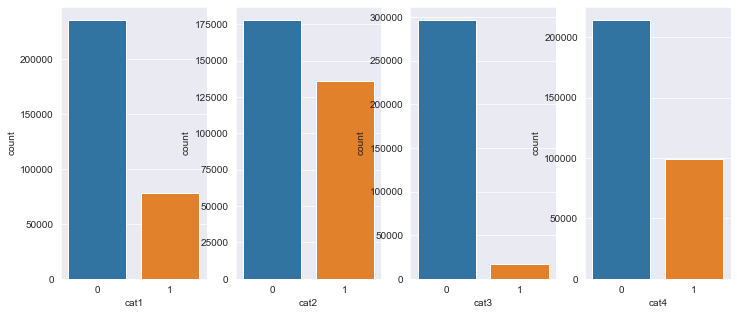

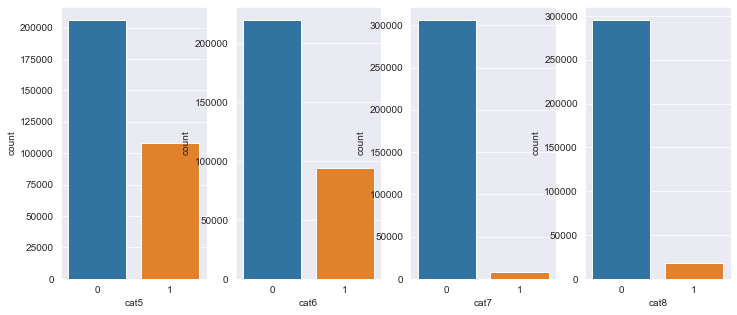

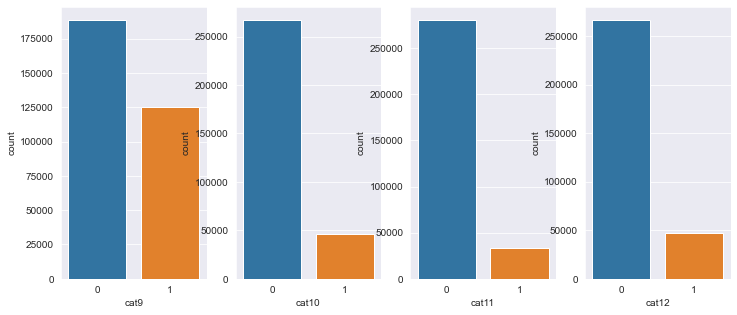

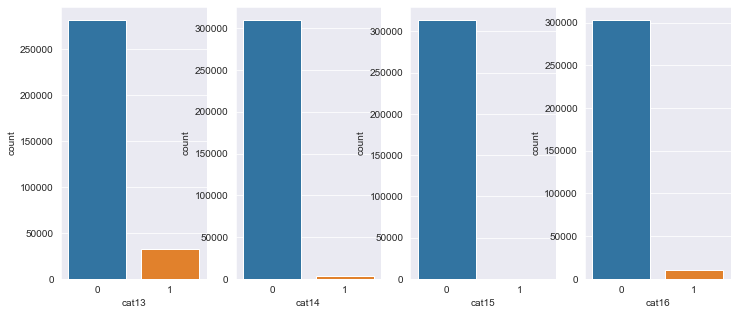

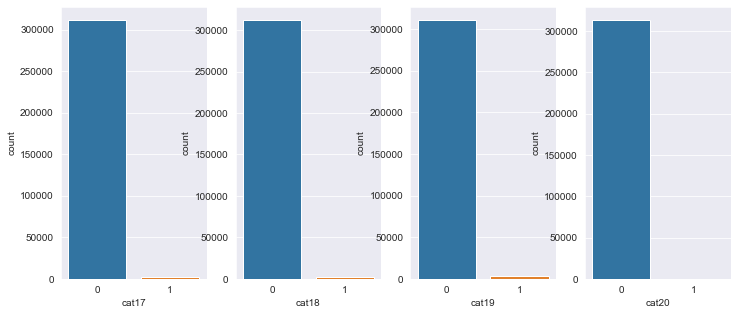

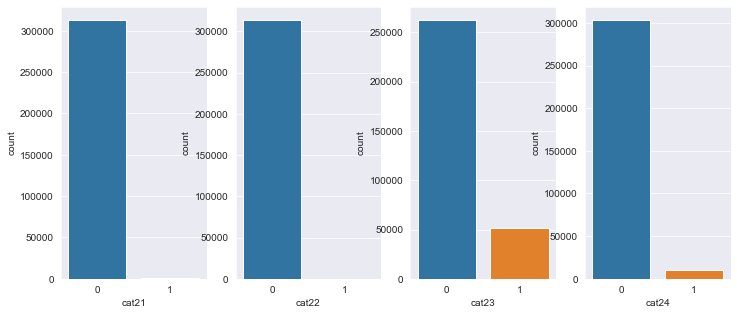

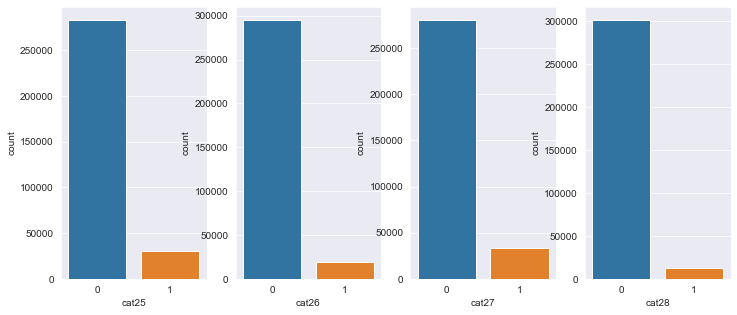

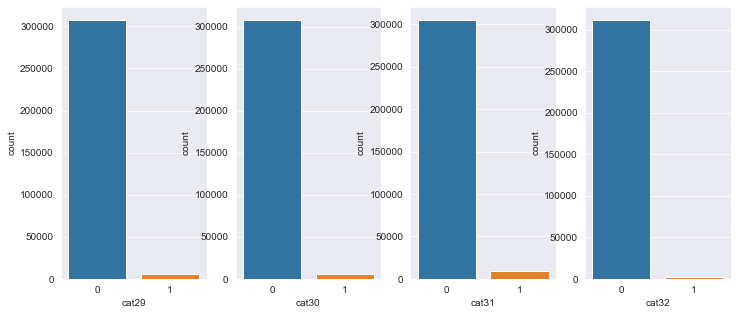

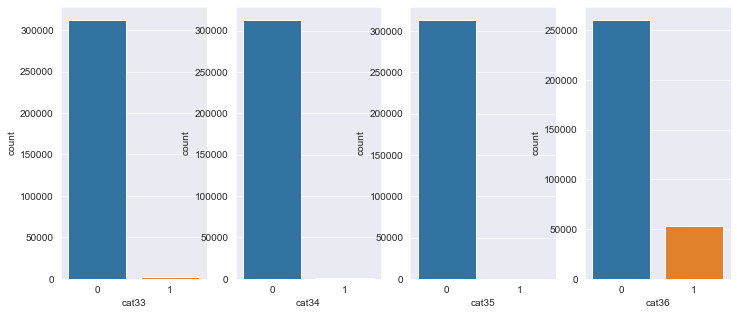

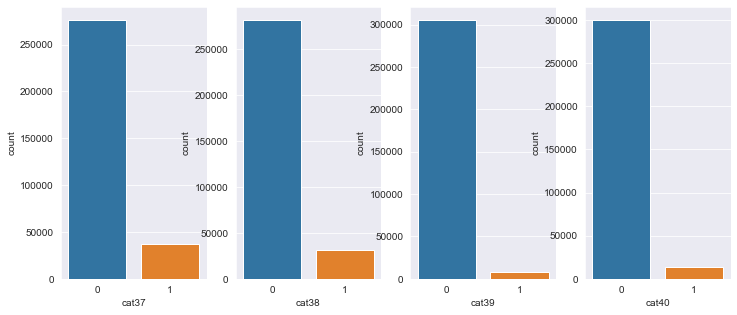

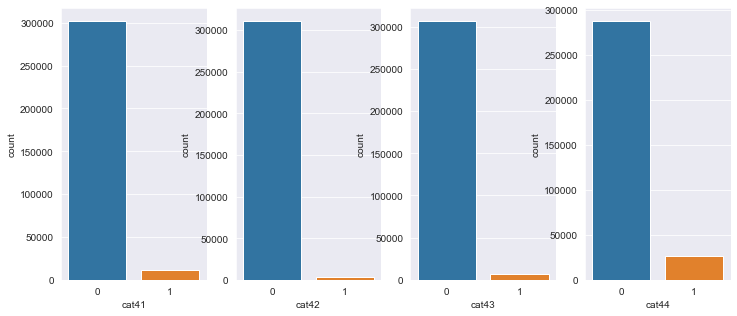

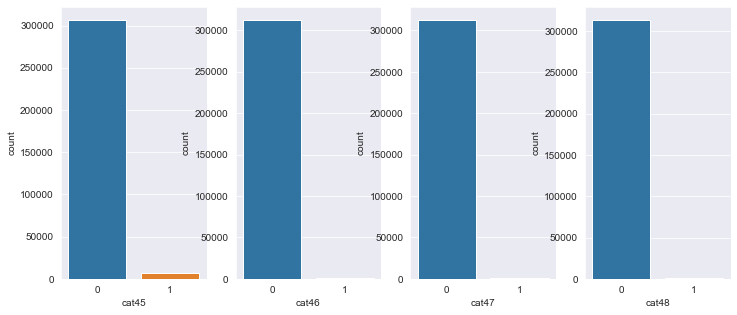

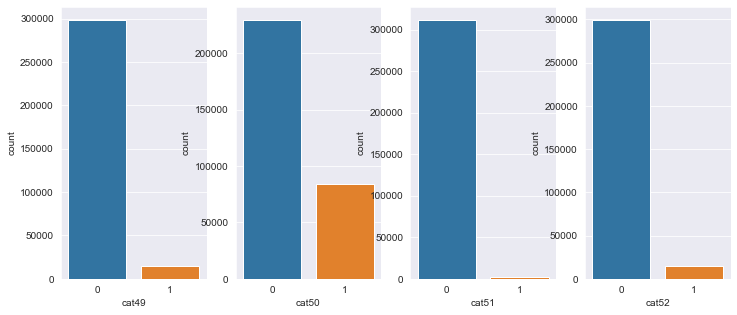

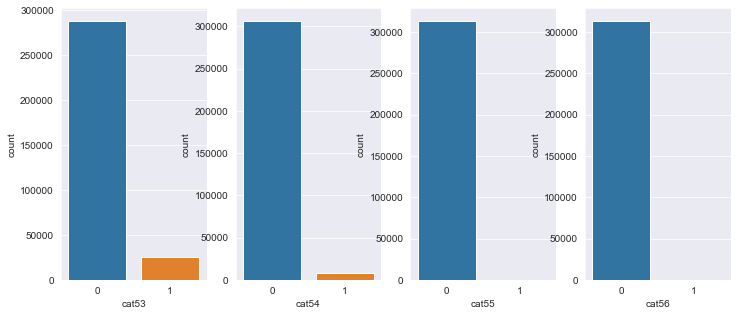

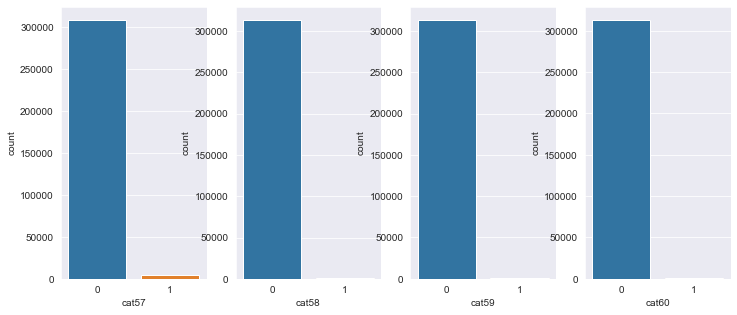

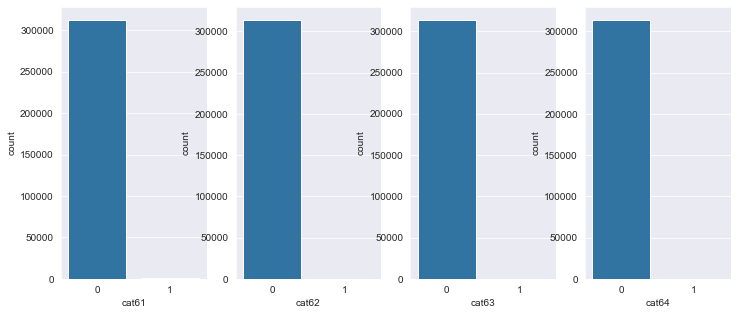

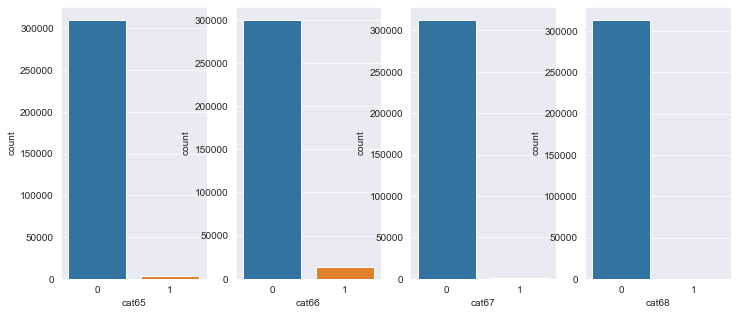

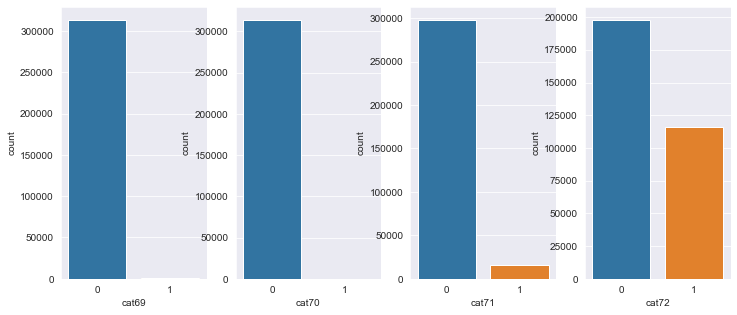

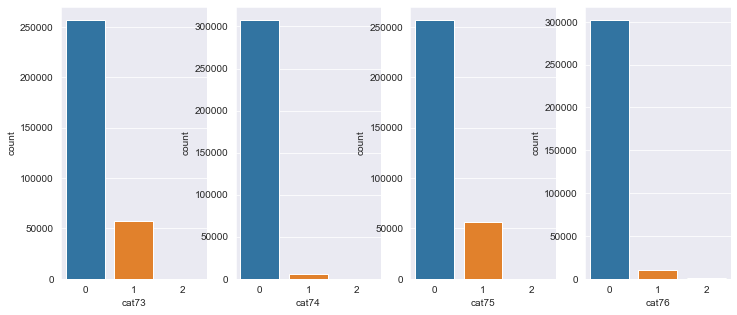

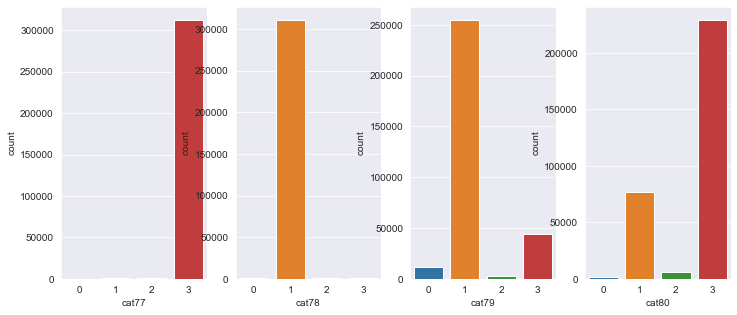

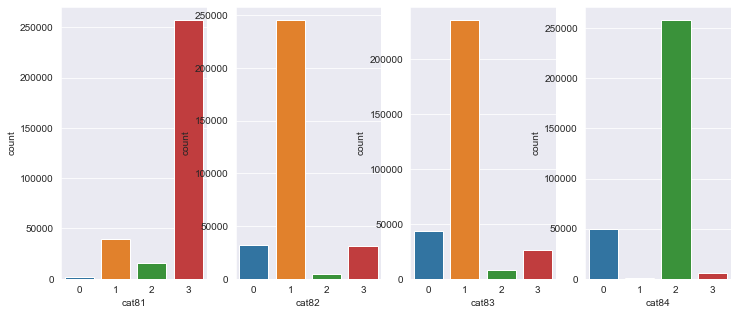

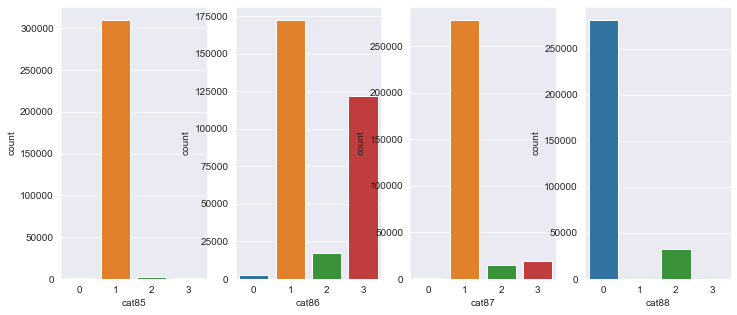

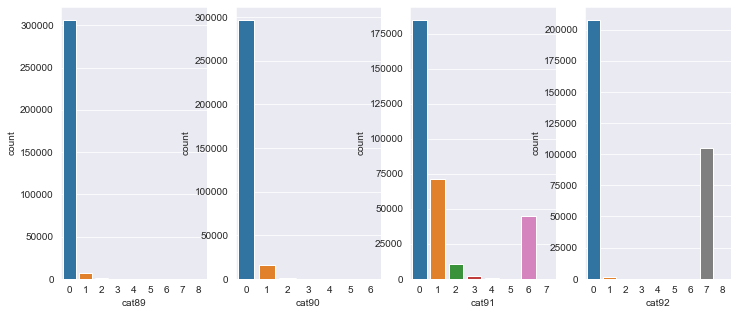

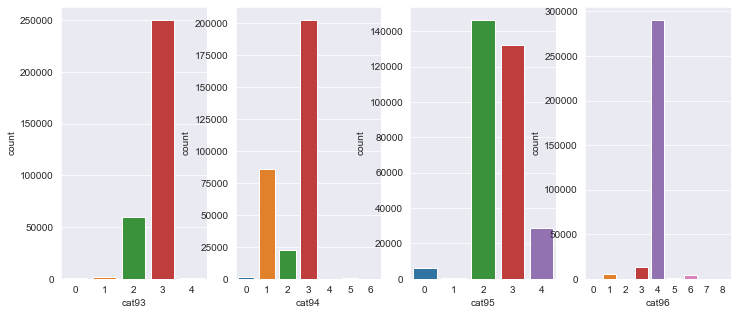

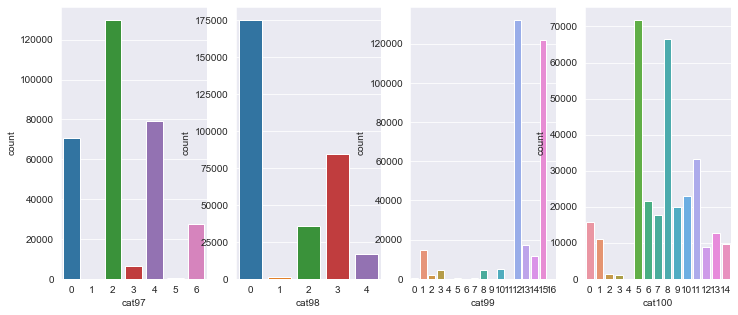

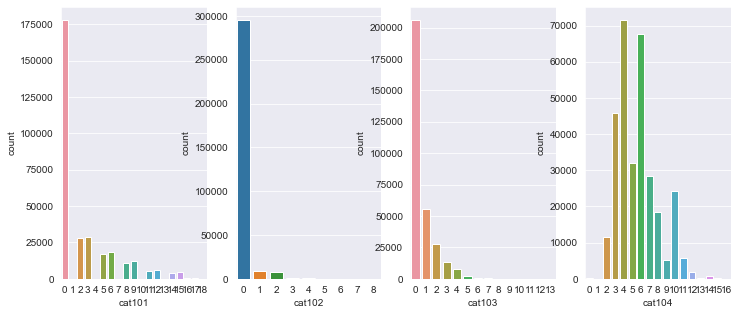

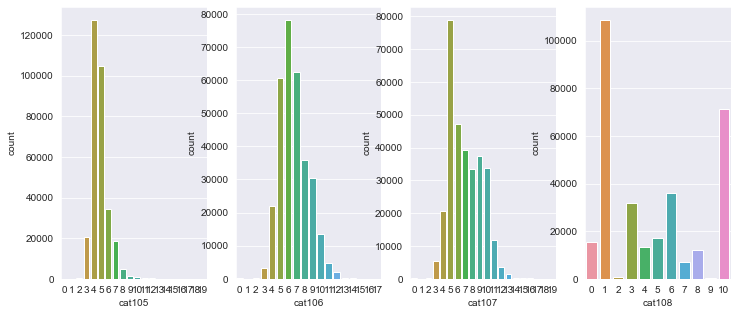

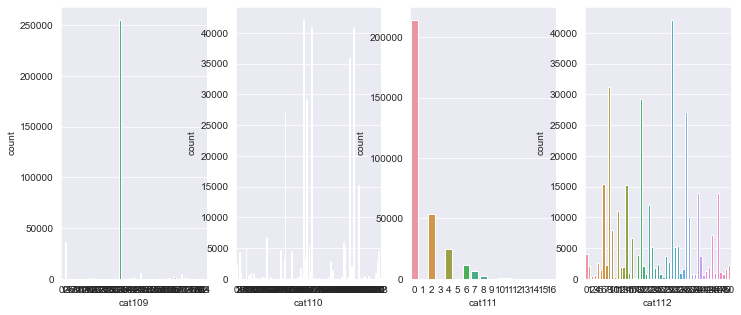

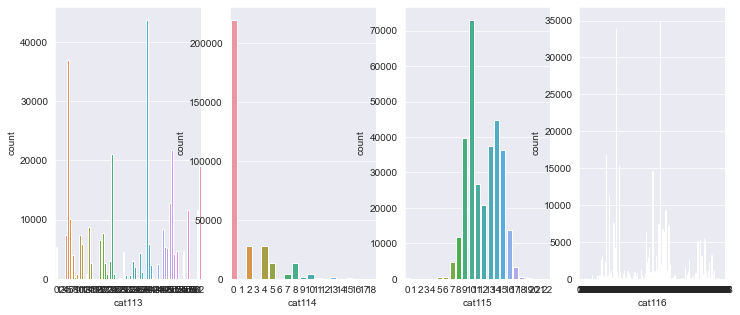

In [33]:
# Plot count plot for all attributes in a 29x4 grid
n_cols = 4
n_rows = 29
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 5))
    for j in range(n_cols):
        sns.countplot(x=cat_cols[i*n_cols+j], data=pro_4, ax=ax[j])

#cat1 to cat72 have only two labels A and B. In most of the cases, B has very few entries
#cat73 to cat 108 have more than two labels
#cat109 to cat116 have many labels

### Target variable

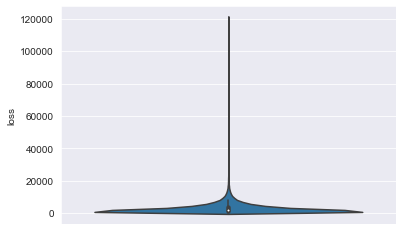

In [19]:
sns.violinplot(data=pro_4,y=pro_4["loss"])
plt.show()

If the response variable is skewed, the model will be trained on a much larger number of low cost claims, and will be less likely to successfully predict the price for the most expensive claims.

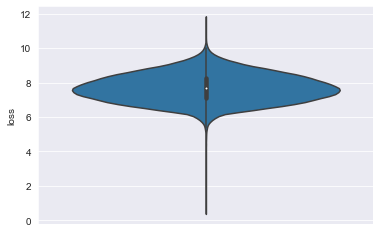

In [20]:
#log1p function applies log(1+x) to all elements of the column
loss = np.log1p(pro_4["loss"])
sns.violinplot(data=pro_4,y=loss)
plt.show()

# Plot shows that skew is corrected to a large extent

<AxesSubplot:xlabel='loss', ylabel='Density'>

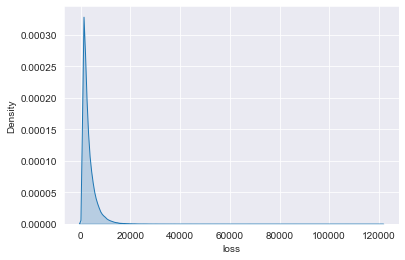

In [21]:
sns.kdeplot(pro_4['loss'], shade=True)

<AxesSubplot:xlabel='loss', ylabel='Density'>

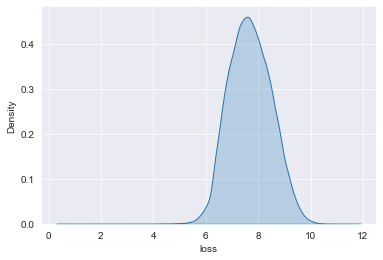

In [22]:
sns.kdeplot(loss, shade=True)

Notes:<br>
We found the terget variable have the problem with skewed data, so we used Log Transform to make it normal.


## Feature Selection
* Categorical
* Numerical

### Numerical Features - corelation analysis

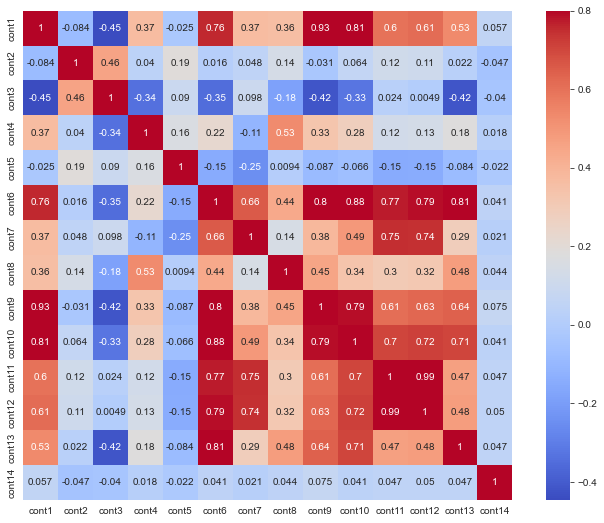

In [23]:
corrmat = pro_4[con_cols].corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='coolwarm')
plt.show()

In [34]:
#
corr_thres = 0.8
# high_corr_pairs = corrmat[(abs(corrmat) > corr_thres) & (abs(corrmat) < 1)].stack().drop_duplicates()
high_corr_pairs = corrmat[(abs(corrmat) > corr_thres) ].stack().drop_duplicates()
high_corr_pairs

cont1   cont1     1.000000
        cont9     0.930675
        cont10    0.808348
cont6   cont10    0.883910
        cont13    0.813994
cont11  cont12    0.994390
dtype: float64

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. We need to fix it by remove the some variables and only keep one in thee correlation group.

In [36]:
variance_sorted = pro_4[con_cols].var().sort_values(ascending=False)
variance_sorted

cont14    0.049523
cont13    0.045331
cont4     0.044564
cont11    0.044101
cont12    0.043981
cont5     0.043707
cont2     0.042872
cont6     0.042187
cont3     0.040788
cont8     0.039777
cont1     0.035257
cont10    0.034561
cont9     0.033069
cont7     0.031873
dtype: float64

We removed the corralted features that have lower variance

In [37]:
drop_cols = []
drop_cols.append('cont12')
drop_cols.append('cont6')
drop_cols.append('cont10')
drop_cols.append('cont9')

In [38]:
for item in drop_cols: con_cols.remove(item)

In [39]:
con_cols

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont7',
 'cont8',
 'cont11',
 'cont13',
 'cont14']

### Categorical features 

In [40]:
# what the standard for setting the var threshold?
from sklearn.feature_selection import VarianceThreshold
var_thres = 0.2
catvar_selector = VarianceThreshold(threshold=var_thres)


### 1. Label Encoding (Factorizing)

In [41]:
from sklearn import preprocessing
LBL = preprocessing.LabelEncoder()
start=time.time()
LE_map=dict()
for cat_col in cat_cols:
    pro_4[cat_col] = LBL.fit_transform(pro_4[cat_col])
    LE_map[cat_col]=dict(zip(LBL.classes_, LBL.transform(LBL.classes_)))
print ('Label enconding finished in %f seconds' % (time.time()-start))

Label enconding finished in 10.844746 seconds


In [42]:
LE_map

{'cat1': {0: 0, 1: 1},
 'cat2': {0: 0, 1: 1},
 'cat3': {0: 0, 1: 1},
 'cat4': {0: 0, 1: 1},
 'cat5': {0: 0, 1: 1},
 'cat6': {0: 0, 1: 1},
 'cat7': {0: 0, 1: 1},
 'cat8': {0: 0, 1: 1},
 'cat9': {0: 0, 1: 1},
 'cat10': {0: 0, 1: 1},
 'cat11': {0: 0, 1: 1},
 'cat12': {0: 0, 1: 1},
 'cat13': {0: 0, 1: 1},
 'cat14': {0: 0, 1: 1},
 'cat15': {0: 0, 1: 1},
 'cat16': {0: 0, 1: 1},
 'cat17': {0: 0, 1: 1},
 'cat18': {0: 0, 1: 1},
 'cat19': {0: 0, 1: 1},
 'cat20': {0: 0, 1: 1},
 'cat21': {0: 0, 1: 1},
 'cat22': {0: 0, 1: 1},
 'cat23': {0: 0, 1: 1},
 'cat24': {0: 0, 1: 1},
 'cat25': {0: 0, 1: 1},
 'cat26': {0: 0, 1: 1},
 'cat27': {0: 0, 1: 1},
 'cat28': {0: 0, 1: 1},
 'cat29': {0: 0, 1: 1},
 'cat30': {0: 0, 1: 1},
 'cat31': {0: 0, 1: 1},
 'cat32': {0: 0, 1: 1},
 'cat33': {0: 0, 1: 1},
 'cat34': {0: 0, 1: 1},
 'cat35': {0: 0, 1: 1},
 'cat36': {0: 0, 1: 1},
 'cat37': {0: 0, 1: 1},
 'cat38': {0: 0, 1: 1},
 'cat39': {0: 0, 1: 1},
 'cat40': {0: 0, 1: 1},
 'cat41': {0: 0, 1: 1},
 'cat42': {0: 0, 1: 1},
 

In [43]:
print(pro_4[cat_cols].shape)

# We remove some categorical features
reduced_cat_cols = catvar_selector.fit_transform(pro_4[cat_cols])
print(catvar_selector.fit_transform(pro_4[cat_cols]).shape)

(313864, 116)
(313864, 39)


### 2. One Hot Encoding (get dummies)

OHE can be done by either Pandas' get_dummies() or SK Learn's OneHotEncoder. 

* get_dummies is easier to implement (can be used directly on raw categorical features, i.e. strings), but it takes longer time and is not memory efficient.

* OneHotEncoder requires the features being converted to numeric, which has already been done by LabelEncoder in previous step, and is much more efficient (7x faster).

* We will convert the OHE's results to a sparse matrix which uses way less memory as compared to dense matrix. However, not all algorithms and packagers support sparse matrix, e.g. Keras. In that case, we'll need to use other tricks to make it work.

In [45]:
OHE = preprocessing.OneHotEncoder(sparse=True)
start=time.time()
pro_4_sparse=OHE.fit_transform(reduced_cat_cols)
print ('One-hot-encoding finished in %f seconds' % (time.time()-start))

print (pro_4_sparse.shape)

One-hot-encoding finished in 0.994510 seconds
(313864, 990)


In [46]:
'''
column1: a, b, c, c, a,b,b,b,d,e,f,g,
label: 0,1,2,2,0,1,1,1
onehot: column1_a, column1_b, column1_c,,,,
            1          0         0
            0          1         0
            0          0         1

'''
    

'\ncolumn1: a, b, c, c, a,b,b,b,d,e,f,g,\nlabel: 0,1,2,2,0,1,1,1\nonehot: column1_a, column1_b, column1_c,,,,\n            1          0         0\n            0          1         0\n            0          0         1\n\n'

## Numerical features

We will apply two preprocessings on numeric features:

1. Apply box-cox transformations for skewed numeric features.

2. Scale numeric features so they will fall in the range between 0 and 1.

**Calculate skewness of each numeric features:**

In [47]:
from scipy.stats import skew, boxcox
skewed_cols = pro_4[con_cols].apply(lambda x: skew(x.dropna()))
skewed_cols
print(skewed_cols.sort_values())

cont2    -0.311146
cont3    -0.007023
cont14    0.250673
cont11    0.281139
cont13    0.376138
cont4     0.417559
cont1     0.513205
cont8     0.673237
cont5     0.679610
cont7     0.825889
dtype: float64


**Apply box-cox transformations:**

In [48]:
threshold = 0.15
skewed_cols = skewed_cols[abs(skewed_cols) > 0.15].index.values
for skewed_col in skewed_cols:
    pro_4[skewed_col],lam = boxcox(pro_4[skewed_col] + 1)

In [49]:
skewed_cols = pro_4[con_cols].apply(lambda x: skew(x.dropna()))
print(skewed_cols.sort_values())

cont2    -0.101841
cont3    -0.007023
cont1     0.004049
cont11    0.023397
cont4     0.051627
cont7     0.054710
cont14    0.068549
cont13    0.092823
cont8     0.124111
cont5     0.205682
dtype: float64


**Apply Standard Scaling:**

In [51]:
SSL = preprocessing.StandardScaler()
for con_col in con_cols:
     pro_4[con_col] = SSL.fit_transform(pro_4[con_col].values.reshape(-1,1))

## Model Building

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

linear_reg = LinearRegression()
lasso = Lasso()
ridge = Ridge()
dt_reg = DecisionTreeRegressor()
nn_reg = MLPRegressor()

In [54]:
from scipy import sparse
full_data_sparse = sparse.hstack((pro_4_sparse,pro_4[con_cols]), format='csr')
print (full_data_sparse.shape)

(313864, 1000)


In [63]:
train_x = full_data_sparse[:claim_size]

train_y = np.log(pro_4[:claim_size].loss.values + 200)

ID = pro_4.id[:claim_size].values


In [64]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

def log_mae(y,yhat):
    return mean_absolute_error(np.exp(y), np.exp(yhat))

log_mae_scorer = metrics.make_scorer(log_mae, greater_is_better = False)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
train_x, X_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=1234)

In [67]:
# Linear Regression

lr = linear_reg.fit(train_x, train_y)

pred_linear_reg = lr.predict(X_val)

log_mae(pred_linear_reg, y_val)

1296.3420228711084

In [70]:
# Decision Tree Regression

dt = dt_reg.fit(train_x, train_y)

pred_linear_reg = dt.predict(X_val)

log_mae(pred_linear_reg, y_val)

1804.4945775807137

In [71]:
# Lasso regression
ls = lasso.fit(train_x, train_y)

pred_linear_reg = ls.predict(X_val)

log_mae(pred_linear_reg,y_val)

1822.3877032233447

In [72]:
# ridge regression
rd = ridge.fit(train_x, train_y)

pred_linear_reg = rd.predict(X_val)

log_mae(pred_linear_reg,y_val)

1291.3924240024933

In [73]:
# nn_reg regression
ng = nn_reg.fit(train_x, train_y)

pred_linear_reg = ng.predict(X_val)

log_mae(pred_linear_reg,y_val)

1410.0786237521022

In [87]:
# in term of log_mae, ridge regression with lowest log_mae is considered as best among 5 models, 
#using ridge model to predict test data claim loss
test_x = full_data_sparse[claim_size:]
  
final_predict = np.exp(rd.predict(test_x)) - 200

In [90]:
results1 = pd.DataFrame()
results1['id'] = pro_4[claim_size:].id
results1['loss'] = final_predict
results1.to_csv("test_p.csv", index=False)
print("Submission created.")

Submission created.


In [98]:
test_p = pd.read_csv('/Users/qi/Desktop/DS /camp/Project4/test_p.csv')

In [99]:
test_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125546 entries, 0 to 125545
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      125546 non-null  int64  
 1   loss    125546 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.9 MB


In [103]:
#merge with test data on id
pro_4_final_predict = pro_4_test.merge(test_p, on = 'id')
print(pro_4_final_predict.info())
pro_4_final_predict.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125546 entries, 0 to 125545
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 127.4+ MB
None


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,...,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562,1464.145721
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045,2080.740757
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,...,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232,7793.610033
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,...,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955,5271.682287
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823,864.134023
5,17,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,B,A,A,A,A,A,...,B,A,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,H,A,A,C,H,G,G,D,B,BI,CL,A,AN,BC,A,I,HY,0.594934,0.245921,0.397983,0.849584,0.643315,0.407351,0.390540,0.46477,0.46853,0.50556,0.607500,0.594646,0.250991,0.283976,1747.947477
6,21,B,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,...,B,C,C,B,D,B,D,A,A,B,H,E,B,C,E,A,C,T,F,A,A,B,K,E,D,G,G,BI,CO,A,AG,S,E,Q,MD,0.964279,0.620805,0.356819,0.838840,0.281143,0.960845,0.740081,0.75964,0.98330,0.82249,0.863052,0.879347,0.888944,0.787807,1992.230739
7,28,B,B,A,A,A,A,A,A,B,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,D,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,H,I,F,A,A,I,F,F,C,A,AB,EL,A,R,X,A,H,KC,0.633389,0.047297,0.129646,0.864586,0.651246,0.451115,0.316313,0.27320,0.52100,0.50556,0.415029,0.481306,0.199940,0.450597,770.582065
8,32,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,G,A,A,F,F,K,M,K,BI,CO,A,U,Y,A,Q,GC,0.261841,0.245921,0.484196,0.463029,0.534484,0.343492,0.358758,0.81900,0.32128,0.36458,0.453334,0.443374,0.695650,0.295075,1839.859664
9,43,A,B,A,A,A,A,A,A,B,B,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,B,B,C,B,D,B,D,A,A,A,A,D,C,C,E,E,C,T,L,M,A,A,F,E,I,H,G,BI,EG,A,N,L,A,O,DT,0.527930,0.488789,0.397983,0.775744,0.281143,0.394921,0.287416,0.92347,0.48320,0.24766,0.359572,0.352251,0.519989,0.602666,3729.559357
